In [27]:
import pandas as pd
import tensorflow as tf

from keras.preprocessing.sequence import TimeseriesGenerator

from keras import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers.legacy import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
def plot_history(history):
    mse = history.history['mape']
    val_mse = history.history['val_mape']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(mse) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, mse, 'b', label='Training mse')
    plt.plot(x, val_mse, 'r', label='Validation mse')
    plt.title('Training and validation mse')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [29]:
data = pd.read_csv('data_ml/regions.csv', index_col=0)

In [30]:
data = data.diff().iloc[1:,:]

In [31]:
X = data.values
y = data.Asia.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
tsg_params = {'length':60,'batch_size':128}
train = TimeseriesGenerator(X_train,y_train,**tsg_params)
validation = TimeseriesGenerator(X_train,y_train,**tsg_params)

In [41]:
model = Sequential()
model.add(LSTM(50, input_shape=train[0][0].shape[1:], return_sequences=True, name='LSTM_50'))
model.add(LSTM(150, return_sequences=True, name='LSTM_150'))
model.add(Dense(1, activation='relu', name='Output'))

In [42]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss="mape", metrics=['mape']) 

In [43]:
history = model.fit(train, epochs=3000, validation_data=validation)

Epoch 1/3000
7/7 [==============================] - 2s 142ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 2/3000
7/7 [==============================] - 0s 41ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 3/3000
7/7 [==============================] - 0s 40ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 4/3000
7/7 [==============================] - 0s 41ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 5/3000
7/7 [==============================] - 0s 35ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 6/3000
7/7 [==============================] - 0s 35ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 7/3000
7/7 [==============================] - 0s 34ms/step - loss: 100.0000 - mape: 100.0000 - val_loss: 100.0000 - val_mape: 100.0000
Epoch 8/3000

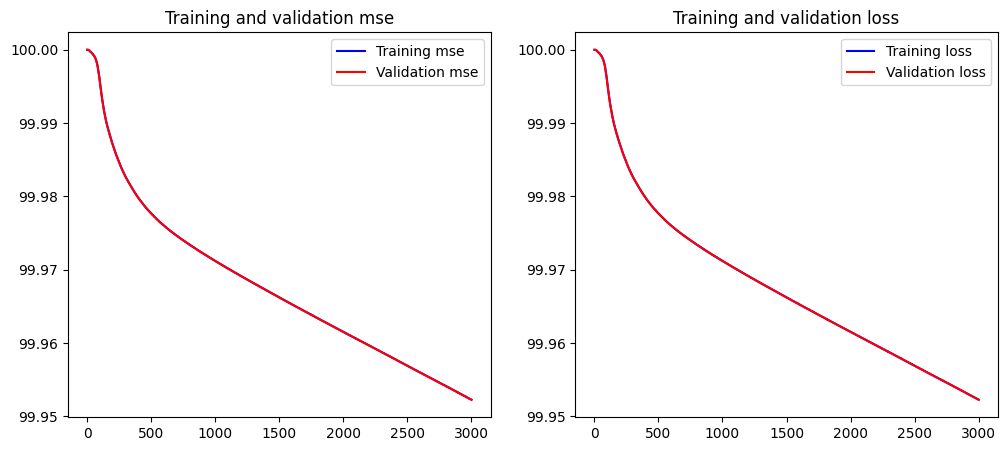

In [44]:
plot_history(history)